In [1]:
import os
import re
import time
from pathlib import Path
import shutil
import glob
import string
import unicodedata
from datetime import datetime, timedelta

import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
from sqlalchemy import create_engine
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from unicodedata import normalize, category

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stopset = set(stopwords.words("spanish"))
print(stopset)

{'estaremos', 'fuese', 'estoy', 'muchos', 'han', 'sin', 'seáis', 'ya', 'me', 'sería', 'seamos', 'estéis', 'estés', 'estuvieseis', 'tened', 'estarán', 'estuvieses', 'tuvieseis', 'estad', 'fueron', 'mío', 'cuando', 'nuestros', 'estarás', 'estarías', 'habiendo', 'eso', 'tuviésemos', 'otros', 'hube', 'tendrá', 'tuvo', 'estados', 'sentidos', 'antes', 'hubieses', 'estabas', 'y', 'tuvieras', 'estábamos', 'serías', 'estuviste', 'esa', 'vosotras', 'un', 'estaríais', 'tus', 'tenido', 'sus', 'estuve', 'fuéramos', 'ante', 'fueras', 'estado', 'sean', 'porque', 'míos', 'tenía', 'fuésemos', 'erais', 'suyos', 'estaba', 'habéis', 'somos', 'hubimos', 'tenemos', 'quien', 'las', 'uno', 'habías', 'estará', 'estamos', 'mí', 'están', 'tuvieses', 'estuvierais', 'también', 'habrás', 'tuviste', 'tanto', 'hubo', 'vuestro', 'tuviese', 'otras', 'en', 'teniendo', 'mía', 'unos', 'habida', 'estaréis', 'estaré', 'e', 'tendrán', 'suyas', 'suya', 'estaban', 'sintiendo', 'habréis', 'tendrías', 'suyo', 'hubieseis', 'habrí

In [3]:
#hoy = datetime.today()
#hoy_format = hoy.strftime('%d%m%Y') 
#hoy_format

In [4]:
#for file in glob.iglob('news/{}/**/*.txt'.format(hoy_format), recursive=True):
#    listado = file.replace('/', '\\').split('\\')
#    
#    if 'descartado' in listado:
#        continue
#        
#    print(listado)
#    with open(file, encoding='UTF-8') as f:
#        new = f.read()
#        
#    break

In [5]:
with open('economia.txt', encoding='UTF-8') as f:
    new = f.read()
    
print(new)

La rápida propagación del coronavirus, ahora convertido en pandemia, está provocando pánico en los mercados financieros, fuga de capitales, devaluación de las monedas frente al dólar y una creciente amenaza de recesión global.
Aunque en un principio la situación parecía estar confinada a los países asiáticos, el escenario actual es completamente distinto: el brote está presente en al menos 114 países, ha contagiado a cerca de 120.000 personas y ha dejado más de 4.200 víctimas fatales.
A la decisión de Italia de poner a todo el país en cuarentena -además de una rápida propagación de la enfermedad en el resto de Europa y Estados Unidos- se suma el desplome de los precios de petróleo y la montaña rusa de las bolsas, haciendo que muchos expertos consideren que una recesión económica global durante el primer semestre de este año sea casi inminente.
Jeffrey Frankel, profesor de la Escuela Harvard Kennedy, de la Universidad de Harvard, le dice a BBC Mundo que la posibilidad de una contracción

In [6]:
len(new.split('\n'))

68

In [7]:
from unicodedata import normalize, category

def clean_text_1(_text):
    """
        Ll : minusculas
        Zs : espacios
        Lu : mayusculas
        Nd : numeros
        Mn : tildes
        Ps : abre dieresis, .....
        Pe : cierra dieresis, .......
        Pi : abre parentesis, .....
        Po : cierra parentesis, punto, coma, .....        
        ...
    """
    selects_characters = ['Ll', 'Zs', 'Lu']
    
    return ''.join([_.lower() for _ in normalize('NFD', _text.replace(' ', 'ZZZ')) if category(_) in selects_characters])

### LIMPIANDO STOPWORDS POR DEFECTO

In [8]:
stopset_cleaned = [clean_text_1(word) for word in stopset]
print(stopset_cleaned)

['estaremos', 'fuese', 'estoy', 'muchos', 'han', 'sin', 'seais', 'ya', 'me', 'seria', 'seamos', 'esteis', 'estes', 'estuvieseis', 'tened', 'estaran', 'estuvieses', 'tuvieseis', 'estad', 'fueron', 'mio', 'cuando', 'nuestros', 'estaras', 'estarias', 'habiendo', 'eso', 'tuviesemos', 'otros', 'hube', 'tendra', 'tuvo', 'estados', 'sentidos', 'antes', 'hubieses', 'estabas', 'y', 'tuvieras', 'estabamos', 'serias', 'estuviste', 'esa', 'vosotras', 'un', 'estariais', 'tus', 'tenido', 'sus', 'estuve', 'fueramos', 'ante', 'fueras', 'estado', 'sean', 'porque', 'mios', 'tenia', 'fuesemos', 'erais', 'suyos', 'estaba', 'habeis', 'somos', 'hubimos', 'tenemos', 'quien', 'las', 'uno', 'habias', 'estara', 'estamos', 'mi', 'estan', 'tuvieses', 'estuvierais', 'tambien', 'habras', 'tuviste', 'tanto', 'hubo', 'vuestro', 'tuviese', 'otras', 'en', 'teniendo', 'mia', 'unos', 'habida', 'estareis', 'estare', 'e', 'tendran', 'suyas', 'suya', 'estaban', 'sintiendo', 'habreis', 'tendrias', 'suyo', 'hubieseis', 'habri

In [9]:
#!pip install spacy                                  -- descomentar la 1era vez

In [10]:
#!pip install stanza                                 -- descomentar la 1era vez

In [11]:
#!pip install "spacy-stanza<0.3.0" --user            -- descomentar la 1era vez

In [12]:
import stanza

In [13]:
#stanza.download('es')                                -- descomentar la 1era vez

In [14]:
from spacy_stanza import StanzaLanguage

In [15]:
snlp = stanza.Pipeline(lang="es")
nlp = StanzaLanguage(snlp)

2021-09-26 04:54:19 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2021-09-26 04:54:19 INFO: Use device: cpu
2021-09-26 04:54:19 INFO: Loading: tokenize
2021-09-26 04:54:19 INFO: Loading: mwt
2021-09-26 04:54:19 INFO: Loading: pos
2021-09-26 04:54:19 INFO: Loading: lemma
2021-09-26 04:54:19 INFO: Loading: depparse
2021-09-26 04:54:20 INFO: Loading: ner
2021-09-26 04:54:21 INFO: Done loading processors!


#### Ampliando STOPWORDS

In [16]:
print(len(stopset_cleaned))

stopset_cleaned = stopset_cleaned + ['caption', 'image']

print(len(stopset_cleaned))

313
315


### LEMMATIZACION QUITANDO STOP WORDS

In [17]:
tokenizacion = [
    [
       ''.join([token.lemma_ for token in nlp(clean_text_1(_))]) for _ in nltk.word_tokenize(sentence) 
                     if len(clean_text_1(_)) > 0 and clean_text_1(_) not in stopset_cleaned
    ] for sentence in nltk.sent_tokenize(new)
]

for oracion in tokenizacion:
    if len(oracion) <= 0:
        continue

    print(oracion)
    print("-"*100)

['rapido', 'propagacion', 'coronaviru', 'ahora', 'convertido', 'pandemia', 'provocar', 'panico', 'mercado', 'financiero', 'fuga', 'capital', 'devaluacion', 'moneda', 'frente', 'dolar', 'creciente', 'amenazar', 'recesion', 'global']
----------------------------------------------------------------------------------------------------
['aunque', 'principio', 'situacion', 'parecer', 'confinar', 'pais', 'asiatico', 'escenario', 'actual', 'completamente', 'distinto', 'brote', 'presente', 'menos', 'pais', 'contagiar', 'cerca', 'persona', 'dejar', 'victima', 'fatal']
----------------------------------------------------------------------------------------------------
['decision', 'italia', 'poner', 'pais', 'cuarentena', 'ademas', 'rapido', 'propagacion', 'enfermedad', 'resto', 'europa', 'unido', 'sumar', 'desplome', 'precio', 'petroleo', 'montana', 'ruso', 'bolsa', 'hacer', 'experto', 'considerar', 'recesion', 'economico', 'global', 'primero', 'semestre', 'ano', 'casi', 'inminente']
------------

### REGRESANDO A MODO TEXTO

In [19]:
print("hola")

hola


In [29]:
import functools

textos = " ".join(functools.reduce(lambda x ,y : x + y , tokenizacion))+" "
print(textos)

rapido propagacion coronaviru ahora convertido pandemia provocar panico mercado financiero fuga capital devaluacion moneda frente dolar creciente amenazar recesion global aunque principio situacion parecer confinar pais asiatico escenario actual completamente distinto brote presente menos pais contagiar cerca persona dejar victima fatal decision italia poner pais cuarentena ademas rapido propagacion enfermedad resto europa unido sumar desplome precio petroleo montana ruso bolsa hacer experto considerar recesion economico global primero semestre ano casi inminente jeffrey frankel profesor escuela harvard kennedy universidad harvard decir bbc mundo posibilidad contraccion economico parecer haber aumentar dramaticamente cerca recesion global advertir saltar recomendación quizas interesar colapso economia chino coronaviru gran amenazar mundo medida economico precedente pais coronaviru grafico mostrar impacto economico coronaviru mundo coronaviru hacer grande economia evitar bancarrota empr

### WORD CLOUD CLASICO

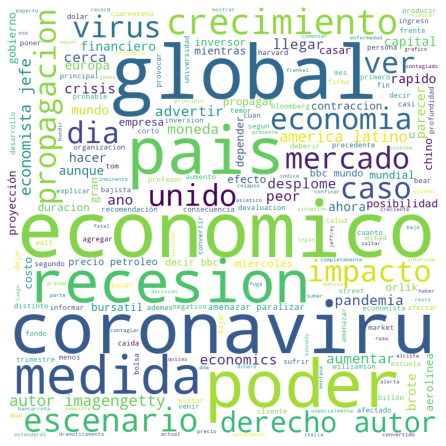

In [31]:
from wordcloud import WordCloud
from PIL import Image 
import matplotlib.pylab as plt

wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    stopwords=stopset_cleaned,
    min_font_size = 10
).generate(textos)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### WORD CLOUD MANZANA

In [64]:
import numpy as np

nube_mask = np.array(Image.open("masked_2.png"))
nube_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [65]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val
    
transformed_nube_mask = np.ndarray((nube_mask.shape[0], nube_mask.shape[1]), np.int32)

for i in range(len(nube_mask)):
    transformed_nube_mask[i] = list(map(transform_format, nube_mask[i]))
    
transformed_nube_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

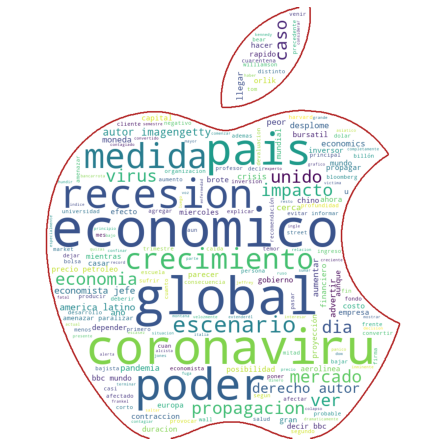

In [66]:
wordcloud = WordCloud(
    mask=transformed_nube_mask,
    width = 800, height = 800,
    background_color ='white',
    contour_width=3, contour_color='firebrick',
    stopwords=stopset_cleaned,
    min_font_size = 5
).generate(textos)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### WORD CLOUD MUNDO

In [73]:
mundo_mask = np.array(Image.open("masked_3.png"))
mundo_mask[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

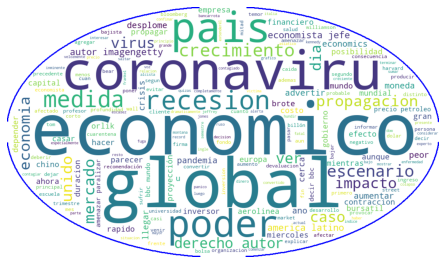

In [76]:
wordcloud = WordCloud(
    mask=mundo_mask,
    width = 1000, height = 1000,
    background_color ='white',
    contour_width=3, contour_color='blue',
    stopwords=stopset_cleaned,
    min_font_size = 2
).generate(textos)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)